PART 1
Generation of random points in space

In [161]:
#libraries

import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import random
import pandas as pd
import math
import scipy
from scipy.stats import norm

In [162]:
#number of atoms
num = 1000

In [163]:
#constants and paramerers

g_ = 3/2
mu_B = 9.2740100783e-24
h_bar = 1.055e-34
gamma = 0.08
# det = (-2*22/7)*(110e3)

In [164]:
#atom positions

dim = 5e-3 #dimeter

x_lst = (np.random.uniform(low=-1, high=1, size=(num,)))*(dim/2)
y_lst = (np.random.uniform(low=-1, high=1, size=(num,)))*(dim/2)
z_lst = (np.random.uniform(low=-1, high=1, size=(num,)))*(dim/2)

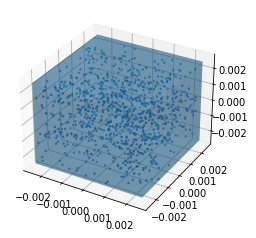

In [165]:
#Cube graph

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def get_cube():   
    phi = np.arange(1,10,2)*np.pi/4 
    Phi, Theta = np.meshgrid(phi, phi)

    x = np.cos(Phi)*np.sin(Theta)
    y = np.sin(Phi)*np.sin(Theta)
    z = np.cos(Theta)/np.sqrt(2)
    return x,y,z

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x_lst, y_lst, z_lst, s=2)

a = dim
b = dim
c = dim
x,y,z = get_cube()


ax.plot_surface(x*a, y*b, z*c, alpha=0.2)


plt.show()

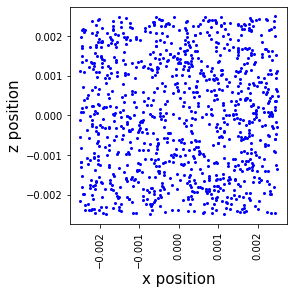

In [166]:
#2D plot

plt.scatter(x_lst, z_lst, s=4, c='b')
ax = plt.gca()
plt.xlabel('x position', fontsize=15)
plt.ylabel('z position', fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.set_aspect(1)
plt.show()


PART 2
Generation of random initial velocities

In [167]:
#Maxwell distribution

pi = 22/7
M = 133*1.67e-27
T = 300
k = 1.38e-23

#standard deviation
sigma = np.sqrt((k*T)/M)

In [168]:
#Maxwell distribution

from scipy.stats import maxwell

u = maxwell.rvs(loc=0, scale=sigma, size=num)


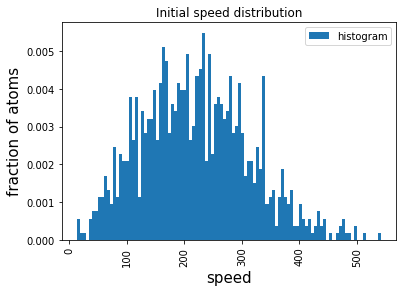

In [169]:
#graph

count, bins, ignored = plt.hist(u, 100, density=True, label='histogram')
plt.legend(loc='upper right')
plt.title('Initial speed distribution')
plt.xlabel('speed', fontsize=15)
plt.ylabel('fraction of atoms', fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.savefig("Initial speed distribution", dpi=1000)
plt.show()


In [170]:
#unit vector and velocity

theta = np.pi*np.random.rand(num)
phi = 2*np.pi*np.random.rand(num)

ux = u*np.sin(theta)*np.cos(phi)
uy = u*np.sin(theta)*np.sin(phi)
uz = u*np.cos(theta)

PART 3
Evolution of the system

In [171]:
#parameters
# 
h_bar=1.055e-34
M=133*(1.67e-27)
g = 9.8
Kwave=(2*22)/(7*852e-9)
del_t = 0.1/(2*pi*5.332e6)
mom = (h_bar*Kwave/M)
print(mom)

0.003504284754344203


In [172]:
Gamma = 2*pi*5.332e6
W1 = 1.0
W2 = 1.0
S = 100
# A = 0.00008
A = 0.1

Kwave=(2*22)/(7*852e-9)

det = (-2*22/7)*(4e3) # -25142.85714285714
# det = Gamma

omega = 1*A*g_*mu_B*gamma/h_bar

In [173]:
(-2*22/7)*(4e3)

-25142.85714285714

In [174]:
#simulation time

time_itt = 1000


#Total time
time_tot = del_t*time_itt
print(time_tot)

2.9837004705721887e-06


In [175]:
#simulation start
x_pos, x_sp = [x_lst], [ux]
y_pos, y_sp = [y_lst], [uy]
z_pos, z_sp = [z_lst], [uz]

In [176]:
from numpy import random
import numpy as np

In [177]:
for i in range(time_itt):
    dum_spx, dum_posx, dum_spy, dum_posy, dum_spz, dum_posz = [], [], [], [], [], []

    
    for j in range(num):
        
        
        p1 = (Gamma*W1*S/2)/(1 + W1*S + (4/Gamma**2)*(det - Kwave*x_sp[i][j] - omega*np.sqrt((np.array(x_pos[i][j]))**2 + (np.array(y_pos[i][j]))**2 + (2*(np.array(z_pos[i][j])))**2))**2)
        p2 = (Gamma*W1*S/2)/(1 + W1*S + (4/Gamma**2)*(det + Kwave*x_sp[i][j] + omega*np.sqrt((np.array(x_pos[i][j]))**2 + (np.array(y_pos[i][j]))**2 + (2*(np.array(z_pos[i][j])))**2))**2)

        dum_spx.append(x_sp[i][j] + mom*(p1 - p2))
        dum_posx.append(x_pos[i][j] + x_sp[i][j]*del_t + mom*(p1 - p2)*del_t)
        
        
       
          
          
            
        p3 = (Gamma*W1*S/2)/(1 + W1*S + (4/Gamma**2)*(det - Kwave*y_sp[i][j] - omega*np.sqrt((np.array(x_pos[i][j]))**2 + (np.array(y_pos[i][j]))**2 + (2*(np.array(z_pos[i][j])))**2))**2)
        p4 = (Gamma*W1*S/2)/(1 + W1*S + (4/Gamma**2)*(det + Kwave*y_sp[i][j] + omega*np.sqrt((np.array(x_pos[i][j]))**2 + (np.array(y_pos[i][j]))**2 + (2*(np.array(z_pos[i][j])))**2))**2)    

        dum_spy.append(y_sp[i][j] + mom*(p3 - p4))
        dum_posy.append(y_pos[i][j] + y_sp[i][j]*del_t + mom*(p3 - p4)*del_t)


        
        
                        

        p5 = (Gamma*W1*S/2)/(1 + W1*S + (4/Gamma**2)*(det - Kwave*z_sp[i][j] - omega*np.sqrt((np.array(x_pos[i][j]))**2 + (np.array(y_pos[i][j]))**2 + (2*(np.array(z_pos[i][j])))**2))**2)
        p6 = (Gamma*W1*S/2)/(1 + W1*S + (4/Gamma**2)*(det + Kwave*z_sp[i][j] + omega*np.sqrt((np.array(x_pos[i][j]))**2 + (np.array(y_pos[i][j]))**2 + (2*(np.array(z_pos[i][j])))**2))**2)
        dum_spz.append(z_sp[i][j] + mom*(p5 - p6) + g*del_t)
        dum_posz.append(z_pos[i][j] + z_sp[i][j]*del_t + mom*(p5 - p6)*del_t + 0.5*g*del_t**2)            
            

    
    
    
    x_sp.append(dum_spx)
    x_pos.append(dum_posx)
    y_sp.append(dum_spy)
    y_pos.append(dum_posy)
    z_sp.append(dum_spz)
    z_pos.append(dum_posz)       




#Simulation end

KeyboardInterrupt: 

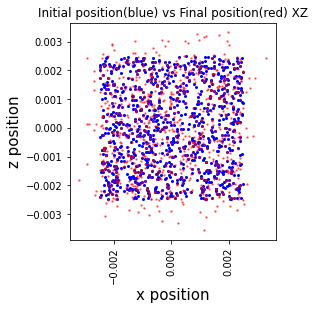

In [ ]:
#Results

plt.scatter(x_lst, z_lst, s=4, c="b",)
plt.scatter(x_pos[-1], z_pos[-1], s=2, c='r', alpha=0.5)
ax = plt.gca()
# plt.xlim([-0.0025, 0.0025])
# plt.ylim([-0.0025, 0.0025])

# plt.plot(5e-3*np.cos(np.linspace(0, 2*np.pi, 100)) , (5e-3)*np.sin(np.linspace(0, 2*np.pi, 100)), linestyle='--')
ax.set_aspect(1)
plt.title('Initial position(blue) vs Final position(red) XZ')
plt.xlabel('x position', fontsize=15)
plt.ylabel('z position', fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.savefig("Initial position(blue) vs Final position(red) XZ 2", dpi=1000)
plt.show()

In [ ]:
#Final speed

v = [0]*num
for q in range(num):
    v[q] = np.sqrt((x_sp[-1][q])**2 + (y_sp[-1][q])**2 + (z_sp[-1][q])**2)

In [ ]:
print(len(v))

1000


In [ ]:

r = [0]*num

for w in range(num):
    r[w] = np.sqrt((np.array(x_pos[-1][w]))**2 + (np.array(y_pos[-1][w]))**2 + (np.array(z_pos[-1][w]))**2)

In [ ]:
print(min(v))
print(min(r))

print(v.index(min(v)))
print(r.index(min(r)))

0.06248890768690943
0.00015393588487194604
225
225


In [179]:
#Aadil
r = 1e-3 # capture radius, we can change this as much as we want, also I have reduced number of atoms and simulation time so that my laptop can run it, you can change it as per your requirement 
captured = 0 # number of particles within capture radius
speed_sum = 0 # sum of speed of particles within capture radius
speed_limit = 50 # speed limit, the speeds of the atoms that we want to consider which are below this number, changeable

for i in range(num):
    if r > np.sqrt((np.array(x_pos[-1][i]))**2 + (np.array(y_pos[-1][i]))**2 + (np.array(z_pos[-1][i]))**2):
        captured = captured + 1
        if( np.sqrt((x_sp[-1][i])**2 + (y_sp[-1][i])**2 + (z_sp[-1][i])**2) < speed_limit):
            speed_sum = speed_sum + np.sqrt((x_sp[-1][i])**2 + (y_sp[-1][i])**2 + (z_sp[-1][i])**2)
        

capture_ratio = captured/num
avg_speed = speed_sum/captured
       
print("The capture percentage is", capture_ratio*100, "%")
print("The average speed of captured particles is", avg_speed, "m/s")

The capture percentage is 2.8000000000000003 %
The average speed of captured particles is 220.612925363084 m/s


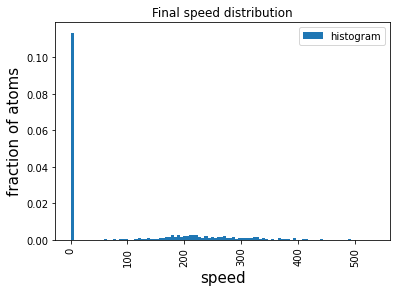

In [ ]:
count, bins, ignored = plt.hist(v, 100, density=True, label='histogram')
plt.legend(loc='upper right')
plt.xlim
plt.title('Final speed distribution')
plt.xlabel('speed', fontsize=15)
plt.ylabel('fraction of atoms', fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.savefig("Final speed distribution", dpi=1000)

plt.show()


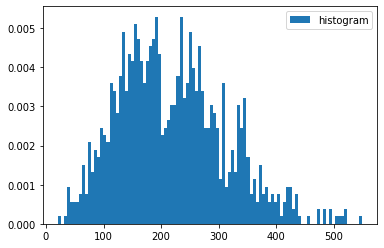

In [ ]:
# Compare with the graph 
count, bins, ignored = plt.hist(u, 100, density=True, label='histogram')
plt.legend(loc='upper right')

plt.show()




In [ ]:
avg = np.mean(v)
var = np.var(v)
sd = np.sqrt(var)

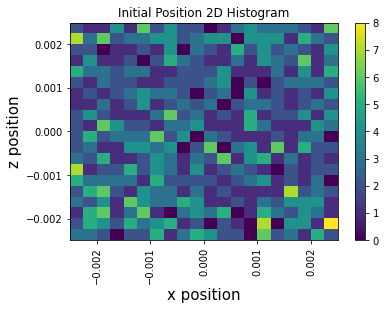

In [ ]:
h =plt.hist2d(x_lst, z_lst, 20)
ax = plt.gca()
# ax.set_aspect(1)
plt.colorbar(h[3])
# plt.xticks(fontsize=15, rotation=90)
# plt.yticks(fontsize=15, rotation=0)
# plt.xlim([-0.0015, 0.0015])
# plt.ylim([-0.0015, 0.0015])


plt.title('Initial Position 2D Histogram')
plt.xlabel('x position', fontsize=15)
plt.ylabel('z position', fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.savefig("Initial Position 2D Histogram", dpi=1000)
plt.show()

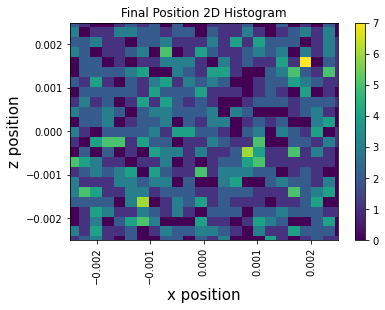

In [ ]:
h =plt.hist2d(x_pos[-1], z_pos[-1], 30)
ax = plt.gca()
# ax.set_aspect(1)
plt.colorbar(h[3])
plt.xticks(rotation=90)
plt.xlim([-0.0025, 0.0025])
plt.ylim([-0.0025, 0.0025])
plt.title('Final Position 2D Histogram')
plt.xlabel('x position', fontsize=15)
plt.ylabel('z position', fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.savefig("Final Position 2D Histogram", dpi=1000)
plt.show()